<a href="https://colab.research.google.com/github/Elangoraj/Social-network-analysis/blob/main/Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pwd = '/content/drive/MyDrive/Networks/ia-enron.csv'

# Analyze a Network

**Load network**

In [4]:
import networkx as nx #---> Library for network analysis
import matplotlib.pyplot as plt #---> Library for creating plots
import collections #---> Library for operating with dictionaries
import random #---> Library for generating random numbers/distributions
import numpy as np #---> Library for efficiently operating with arrays/matrices/vectors
from pylab import rcParams
import matplotlib.colors as mcolors#
import operator
import random as rd

In [5]:
fh = open(pwd, "rb")
Gx = nx.read_edgelist(fh)
fh.close()

**Adjacency Matrix**

In [6]:
# print(nx.adjacency_matrix(Gx))

Text(0, 0.5, 'node idx')

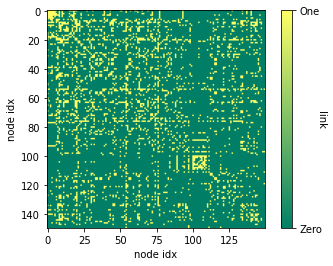

In [7]:
plt.imshow(nx.to_numpy_matrix(Gx), cmap='summer')
cbar = plt.colorbar()
cbar.set_ticks([0,1])
cbar.ax.set_yticklabels(['Zero','One'],)

cbar.set_label('link', rotation=270)
plt.xlabel('node idx')
plt.ylabel('node idx')

**Degree distribution**

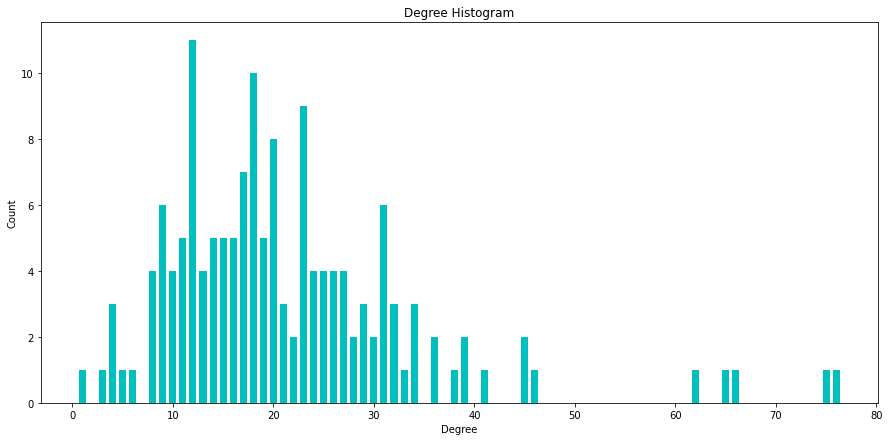

In [8]:
degree_sequence = sorted([d for n, d in Gx.degree()], reverse=True) 
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())                                       
# rcParams['figure.figsize'] = 18, 7 
plt.figure(figsize=(15,7))
plt.bar(deg, cnt, width=0.70, color='c') 

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

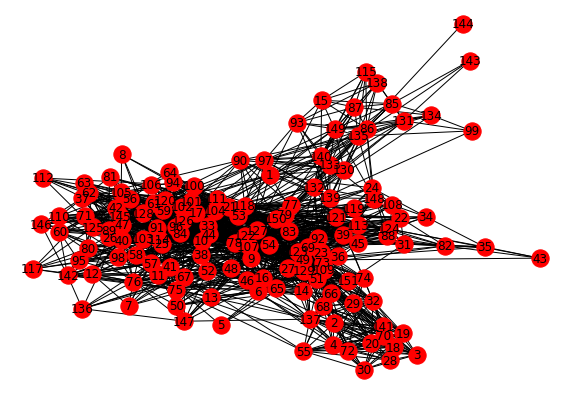

In [9]:
plt.figure(figsize=(10,7))
pos = nx.spring_layout(Gx)
plt.axis('off')
nx.draw(Gx,pos = pos, with_labels=True, node_color= 'r')
plt.show()

**Kolomoropv-Smirnov test**

In [10]:
dc = list(degreeCount.values())

In [11]:
from scipy.stats import lognorm, kstest

sigma, loc, scale = lognorm.fit(dc, floc=0)

mu = np.log(scale)

print("mu    = %9.5f" % mu)
print("sigma = %9.5f" % sigma)

stat, p = kstest(dc, 'lognorm', args=(sigma, 0, scale))
print("KS Test:")
print("stat    = %9.5f" % stat)
print("p-value = %9.5f" % p)

mu    =   0.97465
sigma =   0.76074
KS Test:
stat    =   0.20226
p-value =   0.05103


**Assortative or Disassortative**

In [12]:
nx.degree_assortativity_coefficient(Gx)
# https://math.libretexts.org/Bookshelves/Scientific_Computing_Simulations_and_Modeling/Book%3A_Introduction_to_the_Modeling_and_Analysis_of_Complex_Systems_(Sayama)/17%3A_Dynamical_Networks_II__Analysis_of_Network_Topologies/17.06%3A_Assortativity

-0.04538787508087504

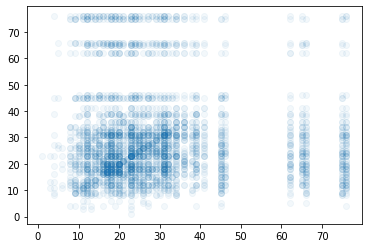

In [13]:
x = []
y = []

for i,j in Gx.edges():
  x.append(Gx.degree(i))
  y.append(Gx.degree(j))
  x.append(Gx.degree(j))
  y.append(Gx.degree(i))

plt.plot(x,y,'o',alpha=0.05)

**Fitting**

In [14]:
!pip install powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24788 sha256=a3c9b06032739a4eec547d497dee23b125f576c0ffe5ff71be1f48a6338b60f2
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


alpha=  4.21041781199002   sigma=  0.7365203583688135


Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


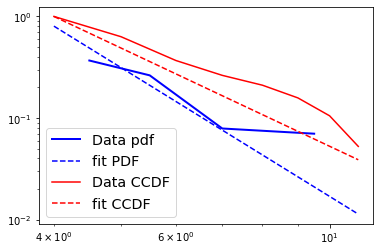

In [15]:
import powerlaw
D = list(degreeCount.values())

D_fit = powerlaw.Fit(D)
plot=D_fit.plot_pdf(color='b', linewidth=2)

D_fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf',ax = plot)

D_fit.plot_ccdf(color= 'r',ax = plot)
D_fit.power_law.plot_ccdf( color= 'r',linestyle='--',label='fit ccdf',ax = plot)

print('alpha= ',D_fit.power_law.alpha,'  sigma= ',D_fit.power_law.sigma)

plt.legend(['Data pdf', 'fit PDF', 'Data CCDF', 'fit CCDF'], fontsize = 'x-large')
plt.show()

# **Centrality and Community Detection**

# Centralities

**Degree centralities:** Degree centrality defined as measurement of the number of connections owned by a node. The higher the degree, the more central the node is. Depends on the direction of the network two seperate measures of degree centrality are defined, indegree and outdegree. Count of incoming ties is the indegree and count of outgoing ties is the outdegree.

Example: Finding popular person within the class in twitter, in medical science to find degree of protein, etc.

**Eigenvector centrality:** It is measures a node’s importance while giving consideration to the importance of its neighbors. Here a node with few connections could have high eigenvector centrality if those few connections were to very well-connected nodes.

Example: Finding Influential person in the country, key author in reseach, impactful people on social media, etc.

**Difference between Degree and Eigenvector centrality:** Degree centrality awards one centrality point for every link to the node. But in eigenvector centrality a node is important if it is linked to by another important nodes. Degree centrality gives the number of relationship degree conected to the node whereas enigenvector gives the influential node in the network. In Eigenvector centrality a node receiving many links does not necessarily have a high eigenvector centrality and a node with high eigenvector centrality is not necessarily highly linked which is opposite way of degree centrality. 

**When to apply:** Usually degree centrality is used when finding highly connected, popular individual, node which can quickly connect to wider network and one which holds most information in the network. Eigenvector is used to understand human social network and understanding networks like malware propogation.  

**Closeness centrality**

In [16]:
import scipy.sparse
import scipy.sparse.csgraph

adj_mat = nx.adjacency_matrix(Gx).tolil()
D = scipy.sparse.csgraph.floyd_warshall(adj_mat, directed=False, unweighted=False)
print(D[1])

[1. 0. 1. 1. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 3. 2. 2. 2. 2. 1. 2. 3. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 3. 2. 2. 2.
 1. 2. 2. 3. 2. 1. 3. 2. 3. 2. 2. 3. 2. 3. 3. 2. 3. 2. 2. 2. 2. 1. 2. 2.
 3. 2. 2. 2. 2. 3. 3. 3. 2. 2. 2. 2. 3. 2. 3. 2. 2. 3. 2. 2. 3. 2. 2. 2.
 2. 2. 2. 3. 2. 3. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 3. 1. 2. 2. 1. 2. 2. 2.
 2. 2. 2. 2. 3. 2.]


In [17]:
def closeness_Centrality(mat):
  out = {}
  # adj_mat = nx.to_numpy_matrix(graph)
  n = len(D)
  for i in range(n):
    if np.sum(mat[i])>0:
      # out.append(round((n-1)/(np.sum(mat[i])),2))
      op = (n-1)/(np.sum(mat[i]))
      out[i] = op
  return out

In [18]:
closeness_cen = closeness_Centrality(D)
# closeness_cen

In [19]:
cl_ce = nx.closeness_centrality(Gx)
# cl_ce

In [20]:
n = D.shape[0]
closeness_centrality = {}
for r in range(0, n):
    
    cc = 0.0
    
    possible_paths = list(enumerate(D[r, :]))
    shortest_paths = dict(filter( \
        lambda x: not x[1] == np.inf, possible_paths))
    
    total = sum(shortest_paths.values())
    n_shortest_paths = len(shortest_paths) - 1.0
    if total > 0.0 and n > 1:
        s = n_shortest_paths / (n - 1)
        cc = (n_shortest_paths / total) * s
    closeness_centrality[r] = cc

**Comparison Centralities**

In [21]:
eg_ce = nx.eigenvector_centrality(Gx)
# eg_ce

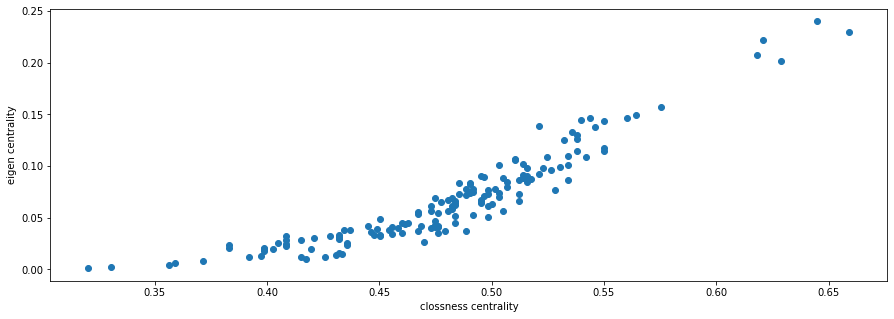

In [22]:
plt.figure(figsize=(15,5))
# plt.scatter(eg_ce.keys(),eg_ce.values())
plt.scatter(cl_ce.values(),eg_ce.values())
plt.xlabel('clossness centrality')
plt.ylabel('eigen centrality')
plt.show()

In [23]:
from scipy.stats import pearsonr
pearsonr(list(cl_ce.values()),list(eg_ce.values()))[0]

0.9250810688678448

**Centrality measure**

In [24]:

max(cl_ce.items(), key=operator.itemgetter(1)),max(eg_ce.items(), key=operator.itemgetter(1))

(('150', 0.6592920353982301), ('122', 0.23999231568820278))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


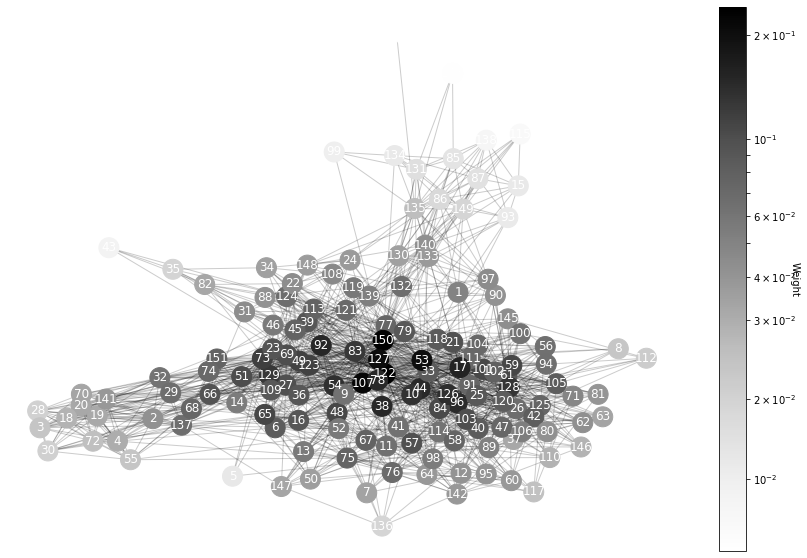

In [61]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(Gx)

nodes = nx.draw_networkx_nodes(Gx, pos, node_size=400, cmap='Greys', node_color=list(eg_ce.values()), nodelist=list(eg_ce.keys())) 
  
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.03, linscale=1)) #<-- Seeting the color map of the nodes in a 

labels = nx.draw_networkx_labels(Gx, pos, font_color='white') #<-- Set the node labels
edges = nx.draw_networkx_edges(Gx, pos, alpha = 0.2) #<-- Set the edges pisitions

cbar = plt.colorbar(nodes) #--> set the range of the color bar

cbar.set_label('Weight', rotation=270) #--> Set the label of the color bar and rotate it

plt.axis('off') #<-- Remove the axis of the network plot
plt.show()

**Influencer**

In [26]:
Gx.degree()

DegreeView({'48': 34, '13': 18, '67': 26, '75': 32, '147': 12, '50': 14, '38': 39, '49': 45, '107': 65, '54': 34, '27': 31, '96': 38, '151': 18, '66': 31, '129': 32, '136': 8, '142': 17, '137': 31, '76': 29, '44': 36, '122': 75, '139': 23, '69': 28, '114': 26, '81': 10, '125': 23, '61': 28, '39': 23, '58': 20, '32': 25, '128': 45, '91': 22, '59': 33, '19': 18, '20': 20, '63': 9, '2': 22, '141': 20, '89': 16, '57': 30, '25': 24, '7': 11, '4': 18, '16': 23, '29': 23, '73': 39, '118': 25, '21': 24, '110': 10, '64': 8, '132': 19, '77': 16, '45': 18, '148': 12, '150': 76, '101': 31, '18': 19, '68': 27, '62': 12, '60': 13, '88': 9, '40': 27, '123': 29, '127': 62, '111': 21, '104': 16, '102': 19, '26': 18, '28': 16, '78': 36, '119': 13, '11': 20, '33': 32, '31': 14, '17': 46, '146': 10, '53': 66, '52': 23, '37': 12, '90': 13, '145': 12, '42': 25, '47': 21, '70': 20, '1': 18, '3': 17, '34': 9, '108': 12, '100': 18, '140': 26, '121': 17, '113': 20, '56': 15, '9': 23, '130': 15, '124': 19, '35':

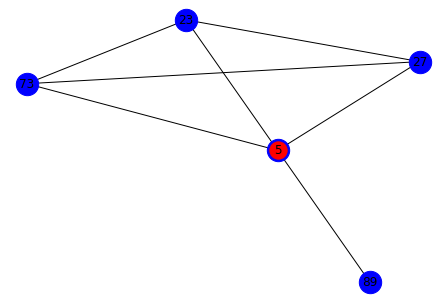

In [27]:
from operator import itemgetter
node_and_degree = Gx.degree()

n = '5'

(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

hub_ego = nx.ego_graph(Gx, n, distance= 'weight')

# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color="b", node_size=500, with_labels=True)

# # Draw ego as large and red
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=n, **options)
plt.show()

In [28]:
# dict(hub_ego.degree).values()
clusters=np.array(list(set(dict(hub_ego.degree).values())))
dict(hub_ego.degree)

{'23': 5, '27': 5, '5': 4, '73': 5, '89': 1}

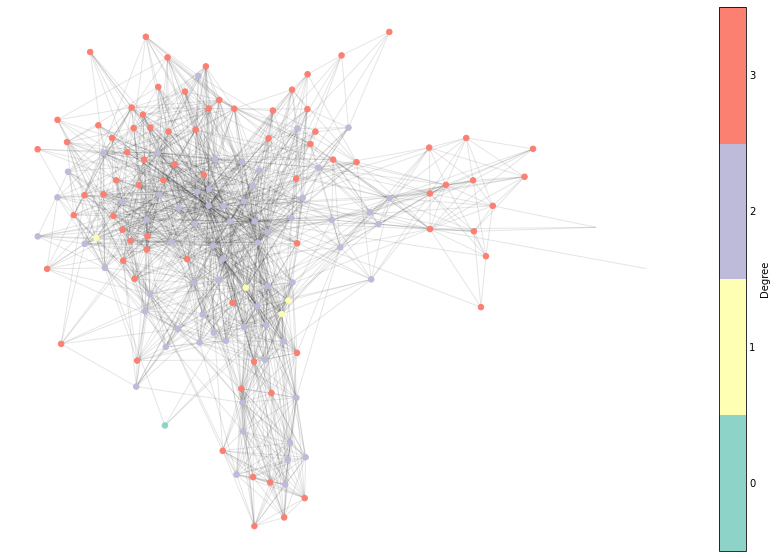

In [29]:
plt.figure(figsize=(15,10))
length=dict(nx.all_pairs_dijkstra_path_length(Gx,cutoff=3))
# print(length[1][4])
measures= length['5']
clusters = np.array(list(set(measures.values())))

# colors = [G[u][v]['color'] for u,v in clusters]

# plt.figure()
pos = nx.spring_layout(Gx)

edges = nx.draw_networkx_edges(Gx, pos, edge_cmap=mcolors.ListedColormap(plt.cm.Set3(clusters)), alpha=0.1)

# Create the plot of the network to be placed in the figure
nodes = nx.draw_networkx_nodes(Gx, pos, node_size=30, cmap=mcolors.ListedColormap(plt.cm.Set3(clusters)), 
                                node_color=list(measures.values()),
                                nodelist=list(measures.keys()))



# Create the title of the plot
# plt.title(measure_name)

# # Add a colour bar to act as a legend
cb = plt.colorbar(nodes,ticks=range(0,len(clusters)), label='Degree')
cb.ax.tick_params(length=0)
# Adds the community labels to the colour bar
cb.set_ticklabels(list(set(measures.values())))


nodes.set_clim(-0.5, len(clusters)-0.5)

# Show the plot without the x/y axis
plt.axis('off')
plt.show()


In [30]:
mcolors.ListedColormap(plt.cm.Set3(clusters))

**(2.e) Community Detection and Centrality**

In [31]:
from collections import Counter, defaultdict #---> Library for operating with dictionaries
import operator #---> Library for doing maths
import seaborn as sns #---> Library for drawing plots
from matplotlib import pyplot, patches #---> Library for drawing plots


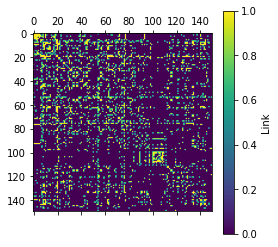

In [32]:
adj = nx.to_numpy_matrix(Gx)
plt.matshow(adj,interpolation=None)
plt.colorbar(label='Link')

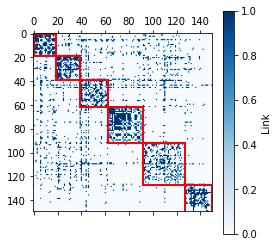

In [33]:
import community
bp = community.best_partition(Gx)
ov = []
for k, v in (Counter(bp.values())).items():
  ov.append([k,v])

ov = sorted(ov, key=operator.itemgetter(1), reverse=True)
nov = [k[0] for k in ov]

tx = {}
for i, j in bp.items():
  tx[i] = nov.index(j)

lo = defaultdict(list)
for i, j in tx.items():
  lo[j].append(i)

lo = lo.values()

loc = [n for c in lo for n in c]
adj = nx.to_numpy_matrix(Gx, nodelist=loc)
plt.matshow(adj,interpolation=None, cmap = plt.cm.Blues)
plt.colorbar(label='Link')

split = [lo]
colours = ['r']

ax = plt.gca()

for split, color in zip(split, colours):
  idx = 0 
  for m in split:
    ax.add_patch(patches.Rectangle((idx,idx),len(m),len(m),facecolor="none", edgecolor = color,linewidth="2"))
    idx += len(m)

In [34]:
def draw_clu(G, pos, measures, measure_name):
  
    # Create an array to contain the clusters which have been found
    clusters=np.array(list(set(measures.values())))

    # Create a figure to draw the plots and charts
    plt.figure()

    # Create the plot of the network to be placed in the figure
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=mcolors.ListedColormap(plt.cm.Set3(clusters)), 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))


    # Add labels to the plot
    labels = nx.draw_networkx_labels(G, pos)

    # Add edges to the plot
    edges = nx.draw_networkx_edges(G, pos)

    # Create the title of the plot
    plt.title(measure_name)

    # Add a colour bar to act as a legend
    cb = plt.colorbar(nodes,ticks=range(0,len(clusters)), label='Communities')
    cb.ax.tick_params(length=0)
    # Adds the community labels to the colour bar
    cb.set_ticklabels(list(set(measures.values())))


    nodes.set_clim(-0.5, len(clusters)-0.5)

    # Show the plot without the x/y axis
    plt.axis('off')
    plt.show()

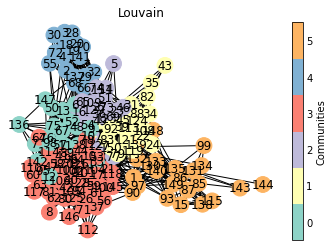

In [35]:

draw_clu(Gx, nx.spring_layout(Gx), community.best_partition(Gx), 'Louvain')

**2.f) Shortest Path**

['151', '66', '53', '135', '144']


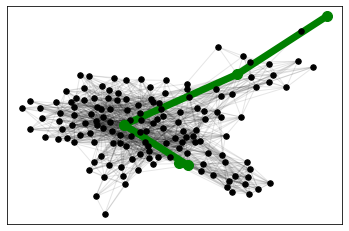

In [36]:
def short_path_plot(G,source,target):
    '''This function calculates the shortest path between two nodes in a network
    
    Attributes:
    G: The networkx object
    source: Name of the source node
    target: Name of the source node'''
    
    pos = nx.spring_layout(G) #<-- Set the layout of the network
    nx.draw_networkx_nodes(G,pos,node_color='k',node_size=30, label=True) #<-- Plot the original network in black
    nx.draw_networkx_edges(G, pos, alpha=0.1)

    s = "{}".format(source)
    t = "{}".format(target)

    path = nx.shortest_path(G,source=s,target=t) #<-- Select the nodes in the shortest path
    print(path)
    path_edges = list(zip(path,path[1:])) #<-- Create a list of iterables with the edges of the shortest path
    nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='g', label=True, node_size=100)  #<-- Plot the nodes
    nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='g',width=7)  #<-- Plot the edges
    # plt.axis('equal')
    plt.show()

#Run the created funtion

#We will detected the shorstet path from one node to the other one
source=151  #<-- Source node
target=144  #<-- Target node

short_path_plot(Gx,source,target)

['151', '66', '53', '135', '144']


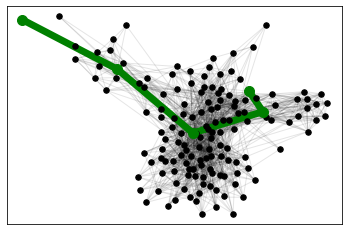

In [37]:
from operator import itemgetter
path = dict(nx.all_pairs_dijkstra_path_length(Gx))

max_path = []
for i in (list(path.keys())):
  max_path.append((i,max(path[i].items(), key=operator.itemgetter(1))[0],max(path[i].items(), key=operator.itemgetter(1))[1]))

source=max(max_path,key=itemgetter(2))[0]  #<-- Source node
target=max(max_path,key=itemgetter(2))[1]  #<-- Target node

short_path_plot(Gx,source,target)

In [38]:
def plot_long_shortest(G):

  path = dict(nx.all_pairs_dijkstra_path_length(G))

  max_path = []
  for i in (list(path.keys())):
    max_path.append((i,max(path[i].items(), key=operator.itemgetter(1))[0],max(path[i].items(), key=operator.itemgetter(1))[1]))

  source=max(max_path,key=itemgetter(2))[0]  #<-- Source node
  target=max(max_path,key=itemgetter(2))[1]  #<-- Target node

  pos = nx.spring_layout(G) #<-- Set the layout of the network
  nx.draw_networkx_nodes(G,pos,node_color='k',node_size=30, label=True) #<-- Plot the original network in black
  nx.draw_networkx_edges(G, pos, alpha=0.1)

  # s = "{}".format(source)
  # t = "{}".format(target)

  path = nx.shortest_path(G,source=source,target=target) #<-- Select the nodes in the shortest path
  print(path)
  path_edges = list(zip(path,path[1:])) #<-- Create a list of iterables with the edges of the shortest path
  nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='g', label=True, node_size=100)  #<-- Plot the nodes
  nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='g',width=7)  #<-- Plot the edges
  plt.show()

['151', '66', '53', '135', '144']


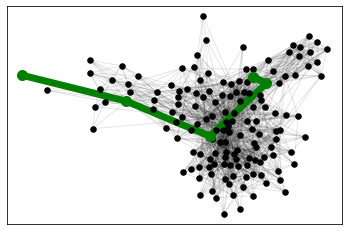

In [39]:
plot_long_shortest(Gx)

In [40]:
# draw(DiG, dpos, nx.katz_centrality(DiG, alpha=0.1, beta=1.0), 'DiGraph Katz Centrality')

# SI Model

In [41]:
def SI_model(G, initial_infecteds , beta, t_simulation):

  initialNodesInfected = initial_infecteds
  population = len(Gx.nodes())  # how many nodes
  beta = beta  # infection rate
  recoveryTime = 15  # how long a node stays 'recovered', not used if gamma is 0

  sData = []  # susceptible data
  infectedData = []  # infected data
  timeList = []  # time data (0 to time)

  def getInfected(graph):
      return [x for x,y in graph.nodes(data=True) if y['infected'] == 1 and y['recovered'] == False]

  def getNeighbors(graph, givenNode):
      return [x for x in graph.neighbors(givenNode)]

  # switch between the three graphs
  graphToUse = G

  # accessing nodes
  nodes = graphToUse.nodes()

  # setting initial conditions
  for node in nodes:
    if int(node) in initialNodesInfected:
        graphToUse.nodes[node]['infected'] = True
    else:
        graphToUse.nodes[node]['infected'] = False
    graphToUse.nodes[node]['recovered'] = False
    graphToUse.nodes[node]['recoveryTime'] = 0

  for t in range(t_simulation):
    # adding the time t
    timeList.append(t)

    # infecting nodes
    infected = getInfected(graphToUse)
    for j in infected:
        neighbors = getNeighbors(graphToUse, j)
        for n in neighbors:
            rand = rd.random()
            if rand <= beta:
                graphToUse.nodes[n]['infected'] = True

    # recording s(t), x(t), r(t)
    infected = getInfected(graphToUse)
    infectedData.append(len(infected))
    sData.append(population - len(infected))
    
    pos = nx.spring_layout(G)

    if t in (10,50,100):
      color_map = []
      for iteration in (list(G.nodes())):
          color_map.append('green')
      print('Day number:',t)
      print(len(infected))
      for i in (infected):
        if int(i)<116:  color_map[int(i)-1] = 'red'
        else:   
          color_map[int(i)-2] = 'red'

      nx.draw(G, pos, node_color=color_map, with_labels=True)
      plt.show()

  
  plt.plot(timeList, sData, label="S")
  plt.plot(timeList, infectedData, label="I")
  plt.legend()
  plt.show()

  return sData, infectedData


Day number: 10
29


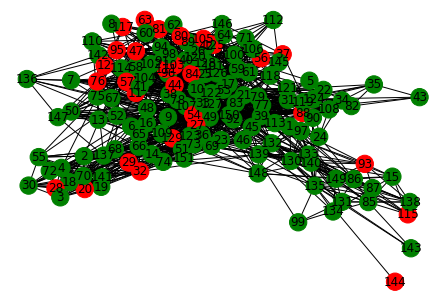

Day number: 50
130


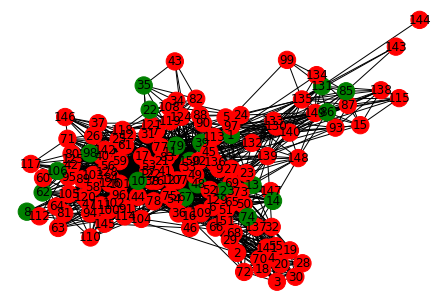

Day number: 100
147


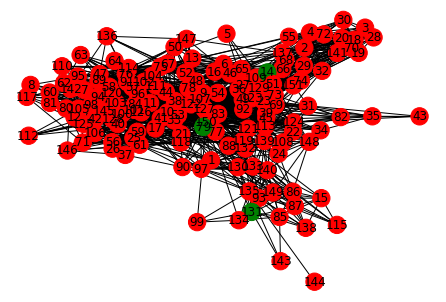

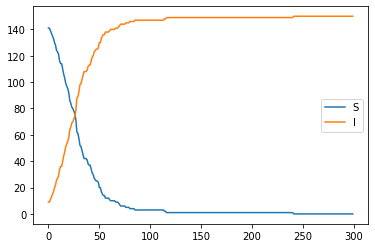

In [42]:
G = Gx
initial_infecteds = [10,15,20,25,30,35,40,45]
beta = 0.005
t_simulation = 300
SI_Suscetible, SI_Infected = SI_model(G, initial_infecteds , beta, t_simulation)

**SIR Model**

In [43]:
def SIR_model(G, initial_infecteds , beta, t_simulation, recoveryTime):

  population = len(Gx.nodes())  # how many nodes
  beta = beta  # infection rate
  # gamma = 1/recoveryTime  # recovery rate, set to 0 for a SI model
  # recoveryTime = recoveryTime  # how long a node stays 'recovered', not used if gamma is 0

  sData = []  # susceptible data
  sData_SIR = []
  infectedData = []  # infected data
  recoveredData = [] 
  timeList = []  # time data (0 to time)

  def getInfected(graph):
      return [x for x,y in graph.nodes(data=True) if y['infected'] == 1 and y['recovered'] == False]

  def getNeighbors(graph, givenNode):
      return [x for x in graph.neighbors(givenNode)]
  
  def getRecovered(graph):
    return [x for x,y in graph.nodes(data=True) if y['recovered'] == True]

  # switch between the three graphs
  graphToUse = G

  # accessing nodes
  nodes = graphToUse.nodes()

  initial_infecteds_nodes = random.sample(list(graphToUse.nodes()),initial_infecteds)

  initialNodesInfected = []
  for r in range(len(initial_infecteds_nodes)):
    initialNodesInfected.append(int(initial_infecteds_nodes[r]))

  # setting initial conditions
  for node in nodes:
    if int(node) in initialNodesInfected:
        graphToUse.nodes[node]['infected'] = True
    else:
        graphToUse.nodes[node]['infected'] = False
    graphToUse.nodes[node]['recovered'] = False
    graphToUse.nodes[node]['recoveryTime'] = 0

  for t in range(t_simulation):
    # adding the time t
    timeList.append(t)

    # infecting nodes
    infected = getInfected(graphToUse)
    for j in infected:
        neighbors = getNeighbors(graphToUse, j)
        for n in neighbors:
            rand = rd.random()
            if rand <= beta:
                graphToUse.nodes[n]['infected'] = True


    for k in infected:

      if graphToUse.nodes[k]['recoveryTime'] >= recoveryTime:
        graphToUse.nodes[k]['recovered'] = True
      graphToUse.nodes[k]['recoveryTime'] += 1
     
    infected = getInfected(graphToUse)
    infectedData.append(len(infected))
    recovered = getRecovered(graphToUse)
    recoveredData.append(len(recovered))
    sData.append(population - len(infected))
    sData_SIR.append(population - len(infected) - len(recovered))

    pos = nx.spring_layout(G)

    # color_map = []
    # for iteration in (list(G.nodes())):
    #     color_map.append('green')

    if t in (2,30,50):
      color_map = []
      for iteration in (list(G.nodes())):
          color_map.append('b')
      print('Day number:',t)
      print('Infected node count:',len(infected))
      print('Recovered node count:',len(recovered))
      for i in (infected):
        if int(i)<116:  color_map[int(i)-1] = 'r'
        else:   
          color_map[int(i)-2] = 'r'
      for i in (recovered):
        if int(i)<116:  color_map[int(i)-1] = 'g'
        else:   
          color_map[int(i)-2] = 'g'

      nx.draw(G, pos, node_color=color_map, with_labels=True,alpha = 0.2)
      plt.show()


  plt.plot(timeList, sData_SIR, label="SIR Suscetible")
  plt.plot(timeList, infectedData, label="SIR Infected")
  plt.plot(timeList, recoveredData, label="SIR Recovered")
  plt.legend()
  plt.show()
  return sData_SIR, infectedData, recoveredData


Day number: 2
Infected node count: 5
Recovered node count: 0


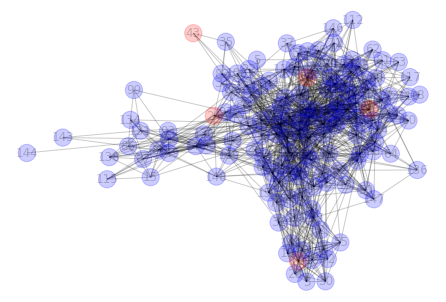

Day number: 30
Infected node count: 26
Recovered node count: 20


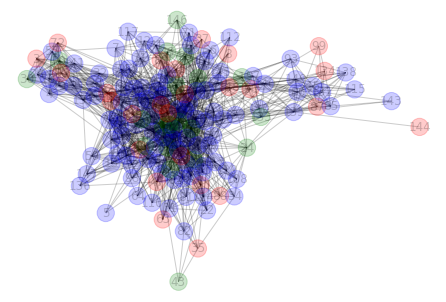

Day number: 50
Infected node count: 27
Recovered node count: 52


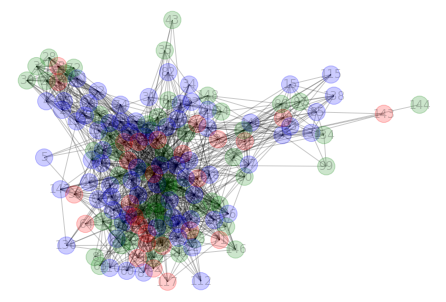

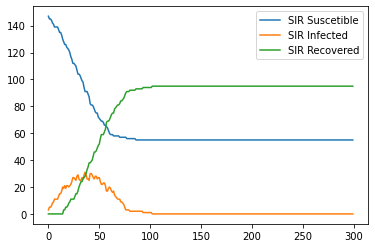

In [44]:
G = Gx
initial_infecteds = 3 # [10,15,20,25,30,35,40,45]
beta = 0.005
t_simulation = 300
recoveryTime = 15
SIR_Suscetible, SIR_infected, SIR_recovered = SIR_model(G, initial_infecteds , beta, t_simulation, recoveryTime)

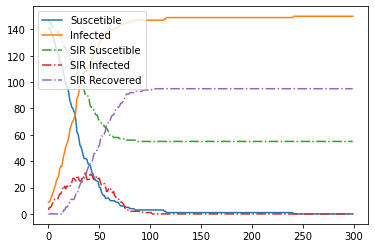

In [45]:
# SIR_Suscetible, SIR_infected, SIR_recovered
# SI_Suscetible, SI_Infected
timeList = np.arange(0,t_simulation)
plt.plot(timeList, SI_Suscetible, label="Suscetible")
plt.plot(timeList, SI_Infected, label="Infected")
plt.plot(timeList, SIR_Suscetible, label="SIR Suscetible", linestyle='-.')
plt.plot(timeList, SIR_infected, label="SIR Infected", linestyle='-.')
plt.plot(timeList, SIR_recovered, label="SIR Recovered", linestyle='-.')
plt.legend()
plt.show()

In [46]:
def Second_wave(G, initial_infecteds , beta, t_simulation, recoveryTime, new_infections):

  population = len(Gx.nodes())  # how many nodes
  beta = beta  # infection rate
  # gamma = 1/recoveryTime  # recovery rate, set to 0 for a SI model
  # recoveryTime = recoveryTime  # how long a node stays 'recovered', not used if gamma is 0

  sData = []  # susceptible data
  sData_SIR = []
  infectedData = []  # infected data
  recoveredData = [] 
  timeList = []  # time data (0 to time)

  def getInfected(graph):
      return [x for x,y in graph.nodes(data=True) if y['infected'] == 1 and y['recovered'] == False]

  def getNeighbors(graph, givenNode):
      return [x for x in graph.neighbors(givenNode)]
  
  def getRecovered(graph):
    return [x for x,y in graph.nodes(data=True) if y['recovered'] == True]

  # switch between the three graphs
  graphToUse = G

  # accessing nodes
  nodes = graphToUse.nodes()

  initial_infecteds_nodes = random.sample(list(graphToUse.nodes()),initial_infecteds)

  initialNodesInfected = []
  for r in range(len(initial_infecteds_nodes)):
    initialNodesInfected.append(int(initial_infecteds_nodes[r]))

  # setting initial conditions
  for node in nodes:
    if int(node) in initialNodesInfected:
        graphToUse.nodes[node]['infected'] = True
    else:
        graphToUse.nodes[node]['infected'] = False
    graphToUse.nodes[node]['recovered'] = False
    graphToUse.nodes[node]['recoveryTime'] = 0

  for t in range(t_simulation):

    timeList.append(t)

    if t<100:
      # infecting nodes
      infected = getInfected(graphToUse)
      for j in infected:
          neighbors = getNeighbors(graphToUse, j)
          for n in neighbors:
              rand = rd.random()
              if rand <= beta:
                  graphToUse.nodes[n]['infected'] = True

      for k in infected:

        if graphToUse.nodes[k]['recoveryTime'] >= recoveryTime:
          graphToUse.nodes[k]['recovered'] = True
        graphToUse.nodes[k]['recoveryTime'] += 1

    elif t>=100:
      infected = getInfected(graphToUse)

      if t == 100:
        sus = []
        for i in graphToUse.nodes():
          if graphToUse.nodes[i]['infected']==False: # (graphToUse.nodes[i]['infected']==True and graphToUse.nodes[i]['recovered']==True) or
            sus.append(i)
        if new_infections > len(sus):
          new_infected_nodes = random.sample(sus,len(sus))
        else:  
          new_infected_nodes = random.sample(sus,new_infections)

        new_infected = []
        for r in range(len(new_infected_nodes)):
          new_infected.append(int(new_infected_nodes[r]))

        # setting new infection conditions
        for node in nodes:
          if int(node) in new_infected:
              graphToUse.nodes[node]['infected'] = True
              graphToUse.nodes[node]['recovered'] = False
              graphToUse.nodes[node]['recoveryTime'] = 0

        for k in infected:
          graphToUse.nodes[k]['recoveryTime'] = 0
        

      for j in infected:
        neighbors = getNeighbors(graphToUse, j)
        for n in neighbors:
            rand = rd.random()
            if rand <= beta:
                graphToUse.nodes[n]['infected'] = True

      for k in infected:
        if graphToUse.nodes[k]['recoveryTime'] >= recoveryTime:
          graphToUse.nodes[k]['recovered'] = True
        graphToUse.nodes[k]['recoveryTime'] += 1


    infected = getInfected(graphToUse)
    infectedData.append(len(infected))
    recovered = getRecovered(graphToUse)
    recoveredData.append(len(recovered))
    sData.append(population - len(infected))
    sData_SIR.append(population - len(infected) - len(recovered))

  plt.plot(timeList, sData_SIR, label="SW Suscetible")
  plt.plot(timeList, infectedData, label="SW Infected")
  plt.plot(timeList, recoveredData, label="SW Recovered")
  plt.legend()
  plt.show()
  return sData_SIR, infectedData, recoveredData


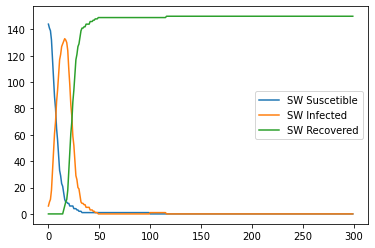

In [47]:
G = Gx
initial_infecteds = 3
beta = 0.02
t_simulation = 300
recoveryTime = 15
new_infections = 30
SW_Suscetible, SW_infected, SW_recovered = Second_wave(G, initial_infecteds , beta, t_simulation, recoveryTime, new_infections)

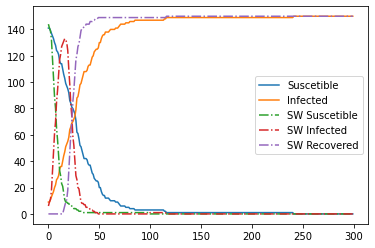

In [48]:
timeList = np.arange(0,t_simulation)
plt.plot(timeList, SI_Suscetible, label="Suscetible")
plt.plot(timeList, SI_Infected, label="Infected")
plt.plot(timeList, SW_Suscetible, label="SW Suscetible", linestyle='-.')
plt.plot(timeList, SW_infected, label="SW Infected", linestyle='-.')
plt.plot(timeList, SW_recovered, label="SW Recovered", linestyle='-.')
plt.legend()
plt.show()

In [49]:
Gx.nodes[i]

{'infected': True, 'recovered': True, 'recoveryTime': 16}